In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing

In [2]:
df = pd.read_parquet('../../Sonar/seatunnel_all_information.parquet')

In [3]:
df['time'] = df['total_time'].astype('int64')

In [4]:
df['time']

0        264468000000000
1        274510000000000
2         19443000000000
3        346946000000000
4       1039167000000000
              ...       
1063       2590000000000
1064      68499000000000
1065        982000000000
1066       2015000000000
1067        554000000000
Name: time, Length: 1068, dtype: int64

In [5]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time', 'time'])]

In [6]:
cl = list(df['total_time'])
cl


[Timedelta('3 days 01:27:48'),
 Timedelta('3 days 04:15:10'),
 Timedelta('0 days 05:24:03'),
 Timedelta('4 days 00:22:26'),
 Timedelta('12 days 00:39:27'),
 Timedelta('4 days 01:57:26'),
 Timedelta('4 days 04:35:26'),
 Timedelta('1 days 01:33:24'),
 Timedelta('6 days 00:56:00'),
 Timedelta('0 days 05:35:02'),
 Timedelta('1 days 18:01:36'),
 Timedelta('17 days 23:05:08'),
 Timedelta('4 days 00:29:57'),
 Timedelta('0 days 01:32:20'),
 Timedelta('3 days 19:59:57'),
 Timedelta('1 days 05:51:25'),
 Timedelta('1 days 09:17:27'),
 Timedelta('0 days 23:20:46'),
 Timedelta('5 days 18:16:01'),
 Timedelta('7 days 20:29:16'),
 Timedelta('0 days 17:23:43'),
 Timedelta('1 days 01:30:08'),
 Timedelta('1 days 01:19:47'),
 Timedelta('3 days 08:30:51'),
 Timedelta('0 days 04:36:49'),
 Timedelta('20 days 11:07:16'),
 Timedelta('1 days 09:16:22'),
 Timedelta('0 days 22:32:40'),
 Timedelta('0 days 18:06:59'),
 Timedelta('2 days 03:20:47'),
 Timedelta('7 days 18:10:04'),
 Timedelta('0 days 21:04:57'),
 Time

In [7]:
X

commits  additions  deletions  changed_files begin_Dispensables  \
0           1         10          4              3              500.0   
1           1          2          1              1              500.0   
2           1         36         67              9              500.0   
3           1         21          2              3              500.0   
4           8        211        212             80              499.0   
...       ...        ...        ...            ...                ...   
1063        4        191         40             12               16.0   
1064        6        470         42             16               14.0   
1065        2         69         49              9               14.0   
1066        1         11       1128             27                2.0   
1067        1         36          0              1                2.0   

      begin_Bloaters  begin_Change Preventers  begin_Couplers  \
0              262.0                    262.0           304.0   
1              262.0                    262.0           304.0   
2              262.0                    262.0           304.0   
3              262.0                    262.0           304.0   
4              261.0                    261.0           304.0   
...              ...                      ...             ...   
1063            14.0                     14.0             7.0   
1064            12.0                     12.0             8.0   
1065            12.0                     12.0             8.0   
1066             3.0                      3.0             3.0   
1067             3.0                      3.0             3.0   

      begin_Object-Orientation Abusers  end_Dispensables  end_Bloaters  \
0                                304.0             500.0         261.0   
1                                304.0             501.0         262.0   
2                                304.0             499.0         261.0   
3                                304.0             500.0         261.0   
4                                304.0             500.0         262.0   
...                                ...               ...           ...   
1063                               7.0              16.0          15.0   
1064                               8.0              16.0          14.0   
1065                               8.0              16.0          14.0   
1066                               3.0              16.0          14.0   
1067                               3.0              14.0          12.0   

      end_Change Preventers  end_Couplers  end_Object-Orientation Abusers  
0                     261.0         304.0                           693.0  
1                     262.0         304.0                           693.0  
2                     261.0         304.0                           693.0  
3                     261.0         304.0                           693.0  
4                     262.0         304.0                           693.0  
...                     ...           ...                             ...  
1063                   15.0           7.0                           102.0  
1064                   14.0           7.0                            89.0  
1065                   14.0           7.0                            89.0  
1066                   14.0           7.0                            89.0  
1067                   12.0           8.0                            89.0  

[1068 rows x 14 columns]

In [8]:
scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [9]:
df_scaler.shape

(14, 1068)

In [10]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [12]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 2


In [13]:
number_of_cluster.sort()
number_of_cluster

[[0.4286, 11],
 [0.4286, 12],
 [0.4286, 13],
 [0.4617, 10],
 [0.4794, 6],
 [0.5609, 3],
 [0.5637, 4],
 [0.5765, 9],
 [0.5909, 5],
 [0.6095, 7],
 [0.627, 8],
 [0.8785, 2]]

In [14]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [15]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [16]:
df['cluster'] = cluster_labels

In [17]:
df.shape

(1068, 21)

In [18]:
df['timedelta'] = pd.to_timedelta(df['time'])

In [19]:
# df['formatted_duration'] = df['timedelta'].apply(lambda x: f"{x.days} days {x.seconds // 3600:02d}:{(x.seconds // 60) % 60:02d}:{x.seconds % 60:02d}")

In [20]:
df['timedelta'][:int(0.7 * len(df))].median()

Timedelta('1 days 00:17:13')

In [21]:
df['timedelta'].min()

Timedelta('0 days 00:00:05')

In [22]:
df['timedelta'].max()

Timedelta('110 days 16:44:58')

In [23]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['timedelta'].min())
print(cluster_0['timedelta'].max())
cluster_0.shape

0 days 00:00:05
110 days 16:44:58


(1066, 22)

In [24]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['timedelta'].min())
print(cluster_1['timedelta'].max())
cluster_1.shape

0 days 12:51:29
2 days 02:35:22


(2, 22)

In [25]:
import seaborn as sns

<Axes: xlabel='Count', ylabel='time'>

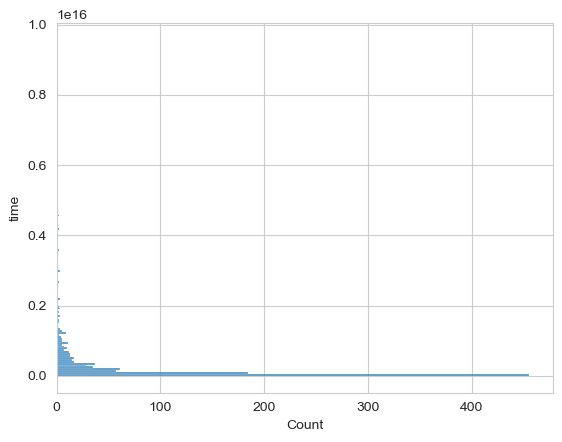

In [27]:
sns.histplot(data=df, y= 'time')

In [28]:
from itertools import chain, combinations

lst =
subsets = chain.from_iterable(combinations(lst, r) for r in range(len(lst) + 1))

for subset in subsets:
    print(subset)

()
('commits',)
('additions',)
('deletions',)
('changed_files',)
('begin_Dispensables',)
('begin_Bloaters',)
('begin_Change Preventers',)
('begin_Couplers',)
('begin_Object-Orientation Abusers',)
('end_Dispensables',)
('end_Bloaters',)
('end_Change Preventers',)
('end_Couplers',)
('end_Object-Orientation Abusers',)
('commits', 'additions')
('commits', 'deletions')
('commits', 'changed_files')
('commits', 'begin_Dispensables')
('commits', 'begin_Bloaters')
('commits', 'begin_Change Preventers')
('commits', 'begin_Couplers')
('commits', 'begin_Object-Orientation Abusers')
('commits', 'end_Dispensables')
('commits', 'end_Bloaters')
('commits', 'end_Change Preventers')
('commits', 'end_Couplers')
('commits', 'end_Object-Orientation Abusers')
('additions', 'deletions')
('additions', 'changed_files')
('additions', 'begin_Dispensables')
('additions', 'begin_Bloaters')
('additions', 'begin_Change Preventers')
('additions', 'begin_Couplers')
('additions', 'begin_Object-Orientation Abusers')
('a

In [30]:
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Define the range of column combinations to consider
min_cols = 1
max_cols = 2

best_score = -1
best_cols = None
best_model = None

# Iterate through different combinations of columns
for num_cols in range(min_cols, max_cols + 1):
    for cols in itertools.combinations(X.columns, num_cols):
        selected_data = X[list(cols)]

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
        kmeans.fit(selected_data)

        # Evaluate clustering quality using silhouette score
        score = silhouette_score(selected_data, kmeans.labels_)


        df_combinations = []
        df_get_col  = pd.DataFrame(df_combinations)
        df_get_col.append(score)
        print(df_get_col)

        # Update the best model if the current score is higher
        if score > best_score:
            best_score = score
            best_cols = cols
            best_model = kmeans

print("Best combination of columns:", best_cols)
print("Best silhouette score:", best_score)
print("Cluster labels for best model:", best_model.labels_)


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

Best combination of columns: ('commits', 'deletions')
Best silhouette score: 0.9895683362940522
Cluster labels for best model: [0 0 0 ... 0 0 0]


In [38]:
import itertools
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of column combinations to consider
min_cols = 2
max_cols = 2

results = []

# Iterate through different combinations of columns
for num_cols in range(min_cols, max_cols + 1):
    for cols in itertools.combinations(X.columns, num_cols):
        selected_data = X[list(cols)]

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
        kmeans.fit(selected_data)

        cluster_labels = kmeans.fit_predict(X)
        X['cluster'] = cluster_labels

        # Find and add the min and max timestamps for each cluster
    for index, row in cluster_labels :
        cluster_labels = row['cluster']
        cluster_min_times = []
        cluster_max_times = []

        for cluster_id in range(num_clusters):
            cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
            cluster_data = X.iloc[cluster_indices]
            min_time = cluster_data['total_time'].min()
            max_time = cluster_data['total_time'].max()
            cluster_min_times.append(min_time)
            cluster_max_times.append(max_time)

        # Evaluate clustering quality using silhouette score
        score = silhouette_score(selected_data, kmeans.labels_)

        # Store the results in a dictionary
        result = {
            'Columns': cols,
            'SilhouetteScore': score,
            'NumClusters': 3,
            'Labels': kmeans.labels_ ,
            'Timemax': cluster_max_times,
            'Timemin' : cluster_min_times
        }

        results.append(result)

# Convert the results list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)
print()

# Save the DataFrame to a CSV file
# results_df.to_csv('clustering_results.csv', index=False)

print("Results saved to clustering_results.csv")


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

TypeError: cannot unpack non-iterable numpy.int32 object

In [42]:
X

commits  additions  deletions  changed_files begin_Dispensables  \
0           1         10          4              3              500.0   
1           1          2          1              1              500.0   
2           1         36         67              9              500.0   
3           1         21          2              3              500.0   
4           8        211        212             80              499.0   
...       ...        ...        ...            ...                ...   
1063        4        191         40             12               16.0   
1064        6        470         42             16               14.0   
1065        2         69         49              9               14.0   
1066        1         11       1128             27                2.0   
1067        1         36          0              1                2.0   

      begin_Bloaters  begin_Change Preventers  begin_Couplers  \
0              262.0                    262.0           304.0   
1              262.0                    262.0           304.0   
2              262.0                    262.0           304.0   
3              262.0                    262.0           304.0   
4              261.0                    261.0           304.0   
...              ...                      ...             ...   
1063            14.0                     14.0             7.0   
1064            12.0                     12.0             8.0   
1065            12.0                     12.0             8.0   
1066             3.0                      3.0             3.0   
1067             3.0                      3.0             3.0   

      begin_Object-Orientation Abusers  end_Dispensables  end_Bloaters  \
0                                304.0             500.0         261.0   
1                                304.0             501.0         262.0   
2                                304.0             499.0         261.0   
3                                304.0             500.0         261.0   
4                                304.0             500.0         262.0   
...                                ...               ...           ...   
1063                               7.0              16.0          15.0   
1064                               8.0              16.0          14.0   
1065                               8.0              16.0          14.0   
1066                               3.0              16.0          14.0   
1067                               3.0              14.0          12.0   

      end_Change Preventers  end_Couplers  end_Object-Orientation Abusers  \
0                     261.0         304.0                           693.0   
1                     262.0         304.0                           693.0   
2                     261.0         304.0                           693.0   
3                     261.0         304.0                           693.0   
4                     262.0         304.0                           693.0   
...                     ...           ...                             ...   
1063                   15.0           7.0                           102.0   
1064                   14.0           7.0                            89.0   
1065                   14.0           7.0                            89.0   
1066                   14.0           7.0                            89.0   
1067                   12.0           8.0                            89.0   

      cluster  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1063        0  
1064        0  
1065        0  
1066        0  
1067        0  

[1068 rows x 15 columns]

In [40]:
import itertools
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of column combinations to consider
min_cols = 2
max_cols = 14

results = []

# Iterate through different combinations of columns
for num_cols in range(min_cols, max_cols + 1):
    for cols in itertools.combinations(X.columns, num_cols):
        selected_data = X[list(cols)]

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
        kmeans.fit(selected_data)

        # Evaluate clustering quality using silhouette score
        score = silhouette_score(selected_data, kmeans.labels_)

        # Get the minimum and maximum timestamp for each cluster
        # cluster_time_ranges = []
        cluster_min_times = []
        cluster_max_times = []
        for cluster_id in range(3):  # Assuming 3 clusters
            cluster_indices = (kmeans.labels_ == cluster_id)
            cluster_data = selected_data[cluster_indices]
            min_time = cluster_data['total_time'].min()
            max_time = cluster_data['total_time'].max()
            # cluster_time_ranges.append((min_time, max_time))
            cluster_min_times.append(min_time)
            cluster_max_times.append(max_time)

        # Store the results in a dictionary
        result = {
            'Columns': cols,
            'NumClusters': 3,
            'SilhouetteScore': score,
            # 'Labels': kmeans.labels_,
            'Timemin': cluster_min_times,
            'Timemax' : cluster_max_times
        }

        results.append(result)

# Convert the results list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
# results_df.to_csv('clustering_results.csv', index=False)

print("Results saved to clustering_results.csv")


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KeyError: 'total_time'

In [ ]:
import itertools
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

# Define the range of column combinations to consider
min_cols = 2
max_cols = 14

results = []

# Iterate through different combinations of columns
for num_cols in range(min_cols, max_cols + 1):
    for cols in itertools.combinations(X.columns, num_cols):
        selected_data = X[list(cols)]

        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters
        kmeans.fit(selected_data)


        number_of_cluster = []
        # Evaluate clustering quality using silhouette score

        for i in range(2, len(df_scaler)):
            km = KMeans(n_clusters = i)
            km.fit(df_scaler)
            sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
            number_of_cluster.append([sil_avg , i])

        # Perform KMeans clustering
        cluster_labels = kmeans.fit_predict(X)
        cluster_min_times = []
        cluster_max_times = []
        cl = []
        # Loop through each cluster
        for cluster_id in range(3):  # Assuming 3 clusters
            cluster_indices = (cluster_labels == cluster_id)
            cluster_data = df[cluster_indices]

            # if clu

            if len(cluster_data) > 0:
                clusters = cluster_data['cluster']
                min_time = cluster_data['timedelta'].min()
                max_time = cluster_data['timedelta'].max()
            else:
                min_time = None
                max_time = None

        # Get the minimum and maximum timestamp for each cluster

            cluster_min_times.append(min_time)
            cluster_max_times.append(max_time)
            cl.append(clusters)

        # Store the results in a dictionary
        result = {
            'Columns': cols,
            'NumClusters': cl,
            'SilhouetteScore': sil_avg,
            'Timemin': cluster_min_times,
            'Timemax': cluster_max_times
        }

        results.append(result)

# Convert the results list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('clustering_results_test_01.csv', index=False)

print("Results saved to clustering_results.csv")

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M